In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../../Data/heart_data_1.csv')
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


In [3]:
df.shape

(70000, 13)

## Checking for Outliers

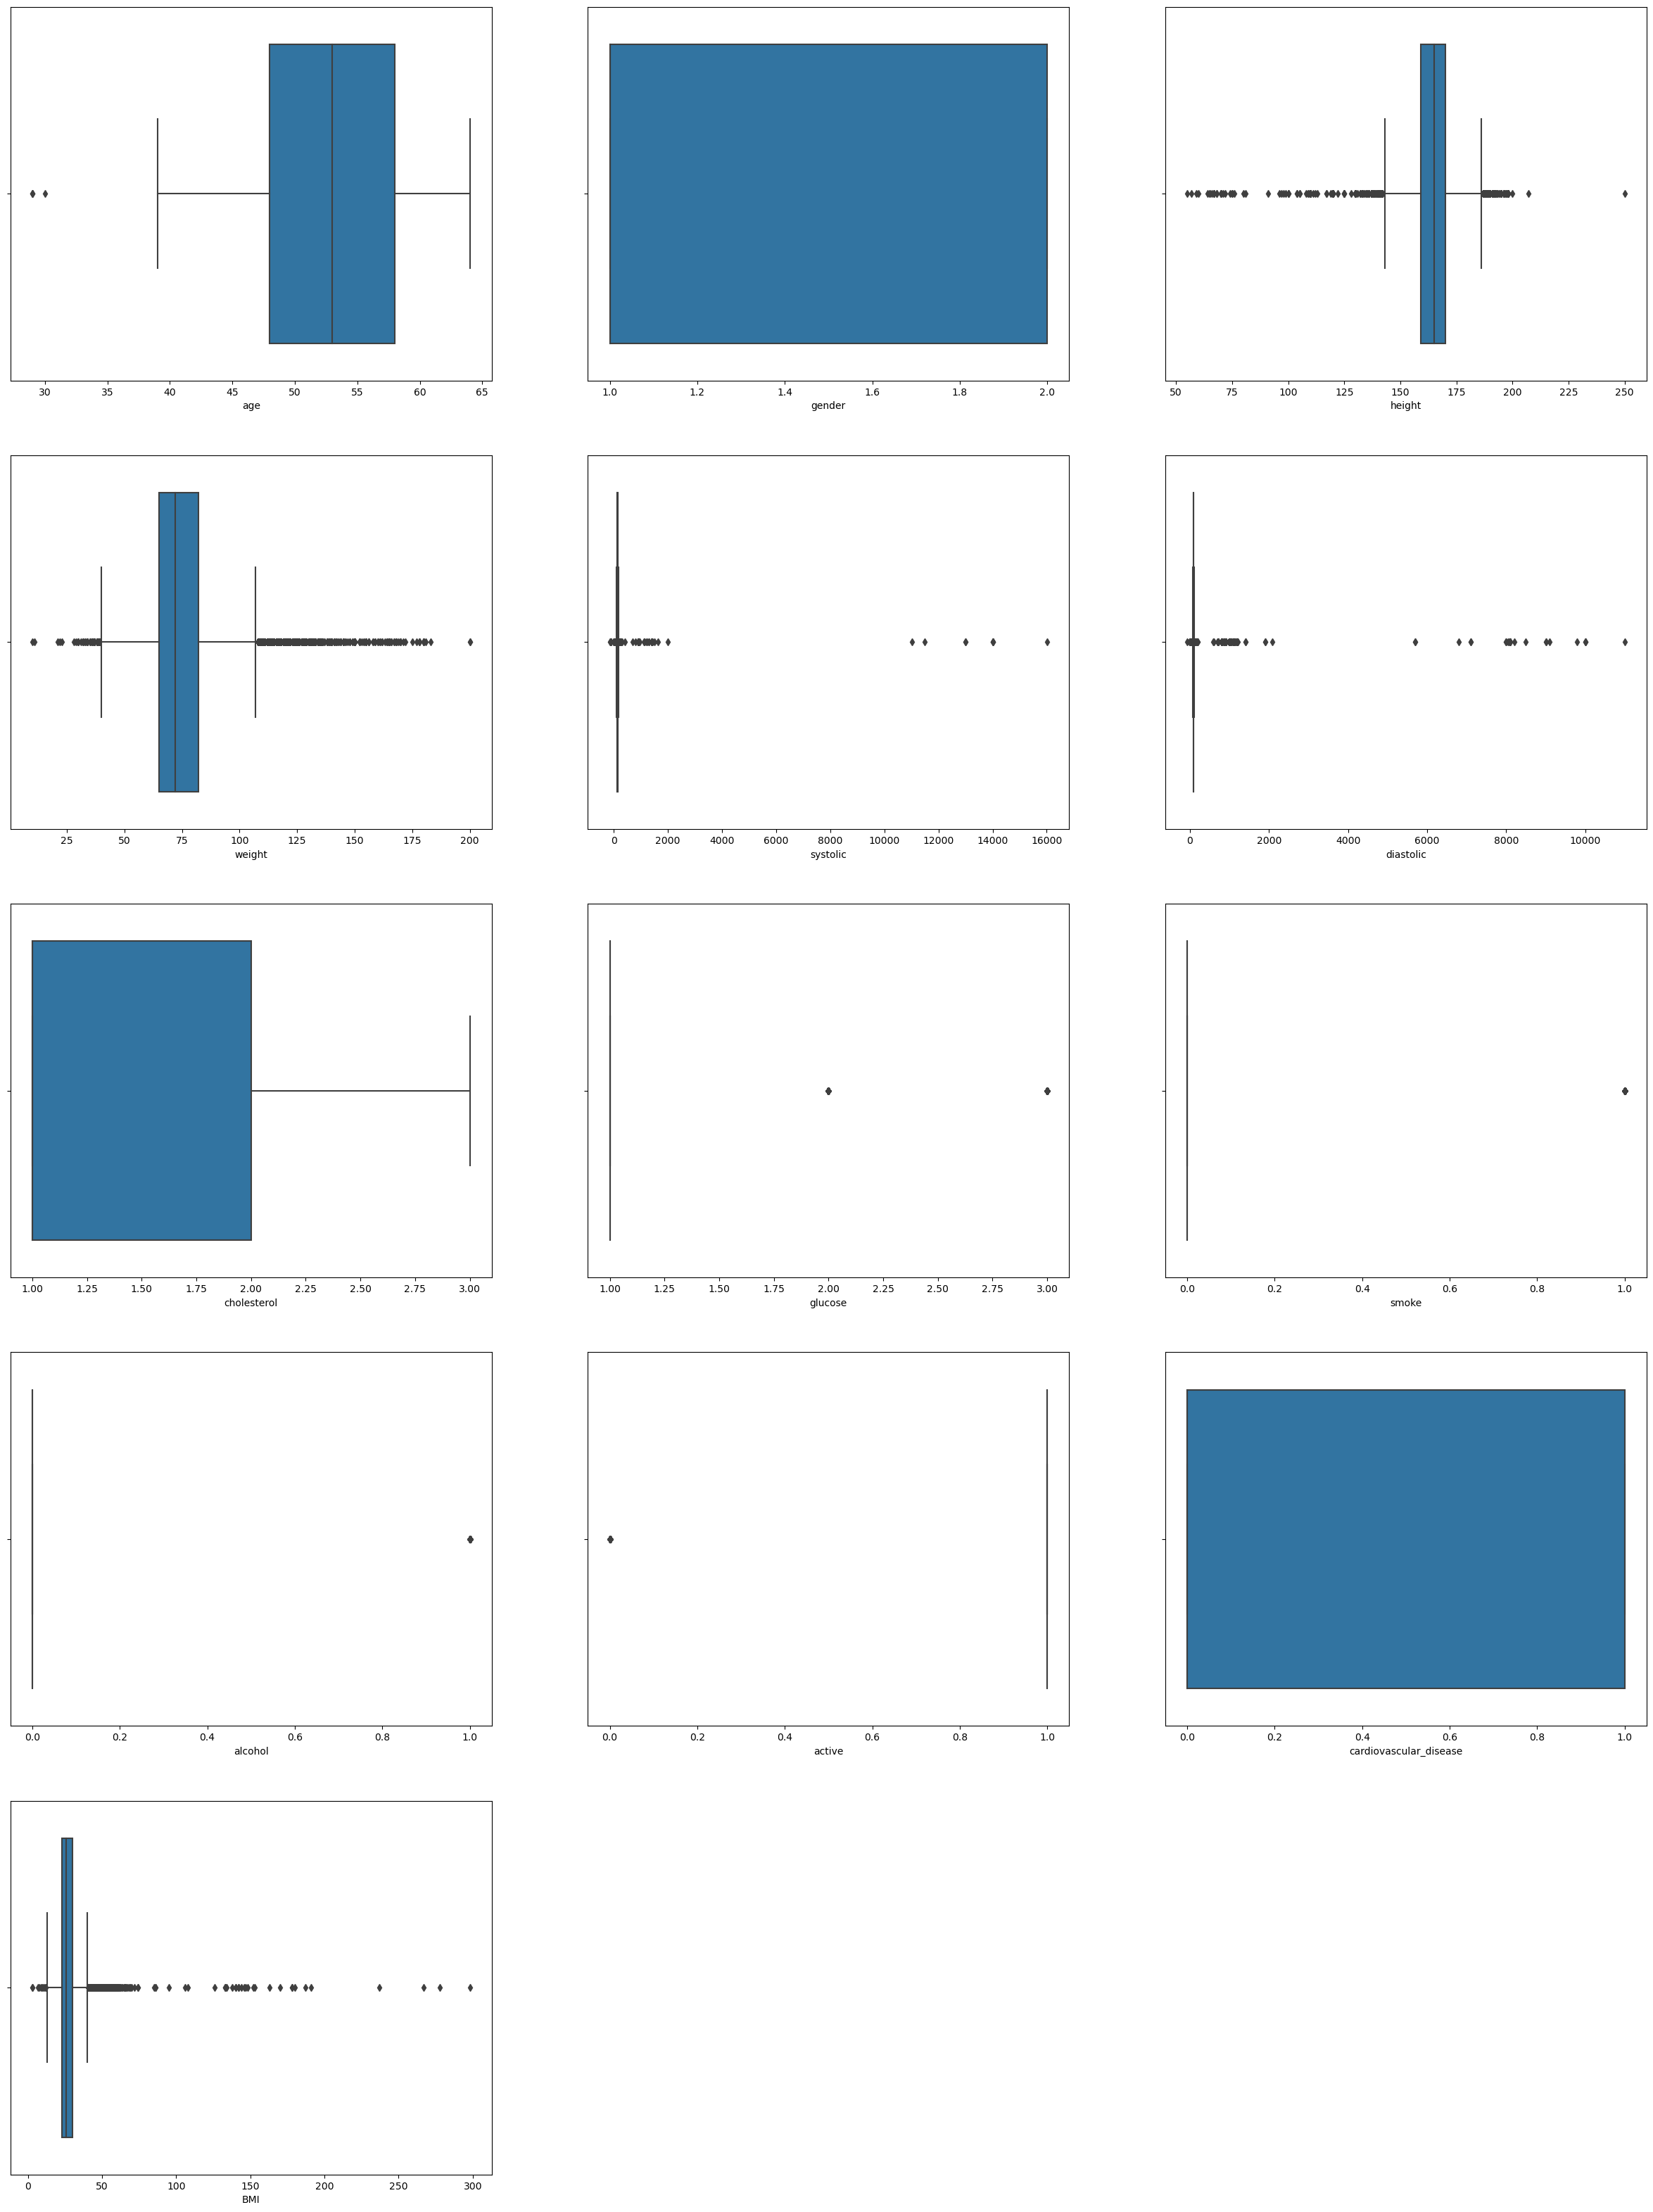

In [4]:
def check_outliers(df):
  num_col = df.select_dtypes(['int32', 'int64']).columns
  nCols = len(num_col)//3+1

  fig,ax = plt.subplots(nCols, 3, figsize = (30, 8*nCols))
  for i, col in enumerate(num_col):
        sns.boxplot(data=df, x=col, ax=ax[i//3][i%3])

  for i in range(len(num_col), 3*nCols):
        fig.delaxes(ax[i//3][i%3])

  plt.show()
    
check_outliers(df)

## Removing Outliers

From the graphs above we can see their are ouliers in the `height`, `weight`, `ap_hi`, `ap_lo` columns of the datasets

### Height & Weight Column

In [7]:
# Let's remove ouliers from the weights and heights column, that fall below 2.5% or above 97.5% of the given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

The first line drops any rows in the dataframe where the `height` column value is either above the `97.5th percentile` or below the `2.5th percentile` of the 'height' column values. The second line does the same thing for the `weight` column.

### AP_hi & Ap_low Column

It is important to note that in some cases the `diastolic` blood pressure can be higher than the `systolic` blood pressure, which is considered incorrect medically and should be addressed.

In [8]:
# How many records are inaccurate in terms of blood pressure?
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['diastolic'] > df['systolic']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [9]:
df.drop(df[(df['systolic'] > df['systolic'].quantile(0.975)) | (df['systolic'] < df['systolic'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['diastolic'] > df['diastolic'].quantile(0.975)) | (df['diastolic'] < df['diastolic'].quantile(0.025))].index,inplace=True)

The first line drops any rows in the dataframe where the `systolic` column value is either above the `97.5th percentile` or below the `2.5th percentile` of the 'height' column values. The second line does the same thing for the `diastolic` column.

In [10]:
# Checking again
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['diastolic'] > df['systolic']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


In [11]:
df.shape

(60144, 13)

## Saving the new datasets

In [13]:
# df.to_csv('../../Data/cardio_data.csv', index=False)

## Correlation

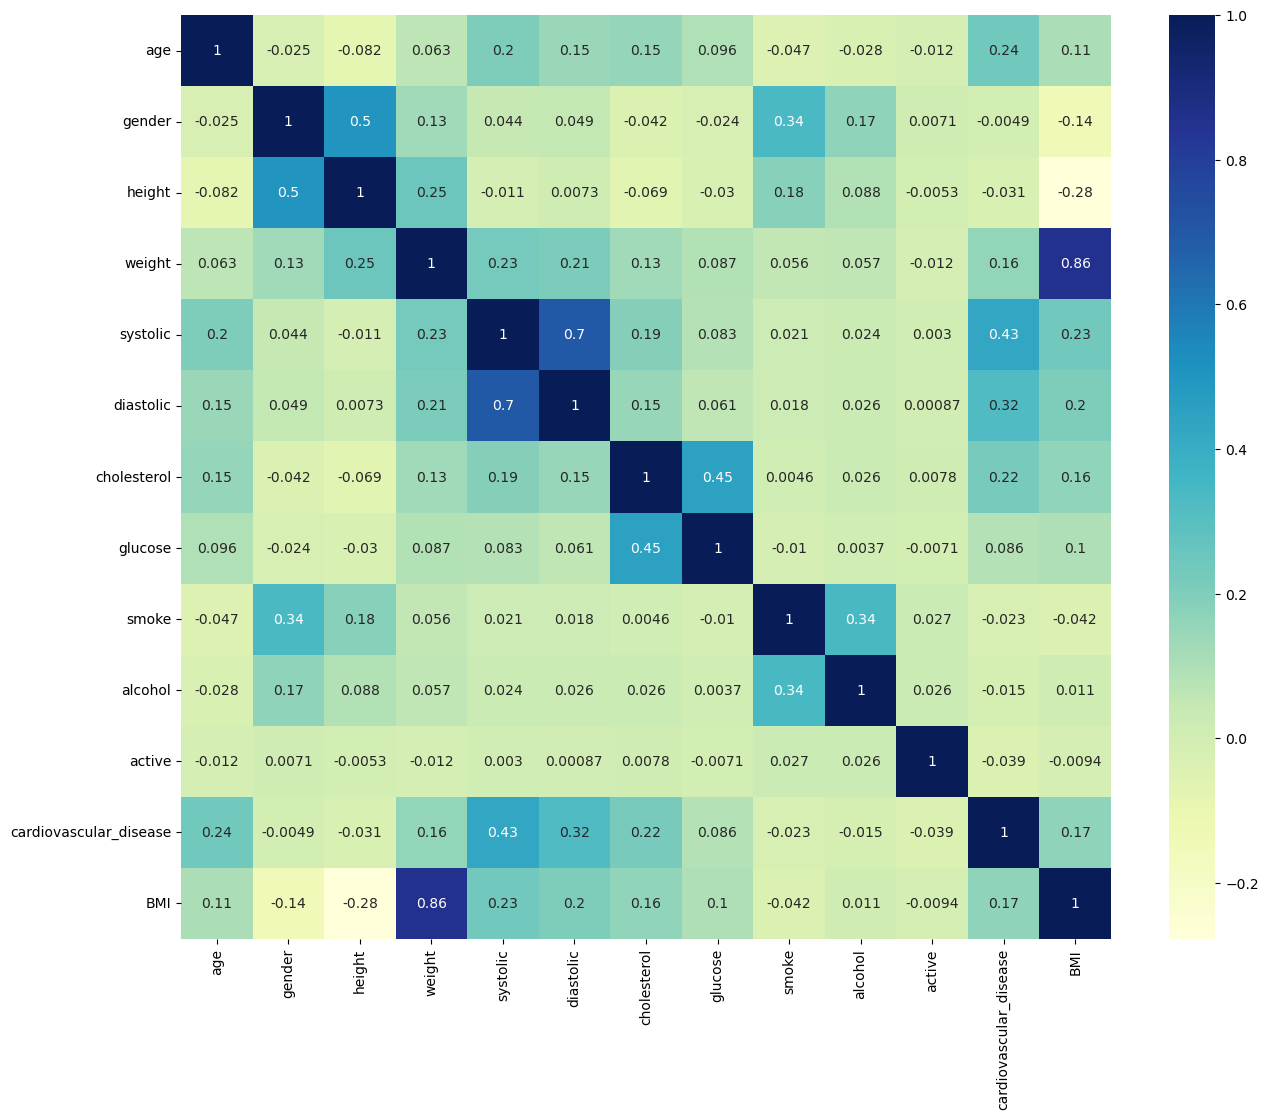

In [14]:
corr = df.corr(method = 'pearson')
plt.figure(figsize = (15,12))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show();